<a href="https://colab.research.google.com/github/masonnystrom/LS_Build_Week_Unit_1/blob/master/Maker_CDP_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:
import plotly.graph_objects as go


In [0]:
import pandas_profiling

In [0]:
from google.colab import files
uploaded = files.upload()

Saving maker_vaults_activity_2019.csv to maker_vaults_activity_2019 (2).csv


In [0]:
"""
Attributes
DATE: The date associated with the set of metrics
LOCK: daily count of times when an owner adds PETH collateral.
GIVE: daily count of times when an owner transfers a CDP to a different owner.
EXIT: daily count of times when a user withdraws collateral by returning PETH to the vault in exchange for the proportional amount of ETH.
FREE: daily count of times when an owner removes PETH collateral.
OPEN: daily count of times when an empty CDP is created.
BITE: daily count of times when a vulnerable CDP is liquidated.
DRAW: daily count of times when a specified amount of Dai is issued.
JOIN: daily count of times when a user joins the collateral pool by depositing ETH in exchange for PETH (pooled ether).
SHUT: daily count of times when a CDP is closed, with all debt cleared, all collateral unlocked and records deleted.
WIPE: daily count of times when some portion of outstanding Dai debt is repayed.
"""

'\nAttributes\nDATE: The date associated with the set of metrics\nLOCK: daily count of times when an owner adds PETH collateral.\nGIVE: daily count of times when an owner transfers a CDP to a different owner.\nEXIT: daily count of times when a user withdraws collateral by returning PETH to the vault in exchange for the proportional amount of ETH.\nFREE: daily count of times when an owner removes PETH collateral.\nOPEN: daily count of times when an empty CDP is created.\nBITE: daily count of times when a vulnerable CDP is liquidated.\nDRAW: daily count of times when a specified amount of Dai is issued.\nJOIN: daily count of times when a user joins the collateral pool by depositing ETH in exchange for PETH (pooled ether).\nSHUT: daily count of times when a CDP is closed, with all debt cleared, all collateral unlocked and records deleted.\nWIPE: daily count of times when some portion of outstanding Dai debt is repayed.\n'

In [0]:
maker_vaults = pd.read_csv('maker_vaults_activity_2019.csv')
print(maker_vaults.shape)
maker_vaults.head()

(424, 11)


,date,actions_lock_total,actions_give_total,actions_exit_total,actions_free_total,actions_open_total,actions_bite_total,actions_draw_total,actions_join_total,actions_shut_total,actions_wipe_total
0,2019-01-15,167,21,92,92,29,2,144,168,4,99
1,2019-01-16,415,263,113,107,276,8,407,415,18,127
2,2019-01-17,408,265,133,112,291,18,395,414,20,123
3,2019-01-01,102,24,36,32,22,0,123,102,6,40
4,2019-01-09,100,24,40,35,36,1,113,100,4,41


In [0]:
maker_vaults.isnull().sum()
# no nulls, thank you Ethereum 

date                  0
actions_lock_total    0
actions_give_total    0
actions_exit_total    0
actions_free_total    0
actions_open_total    0
actions_bite_total    0
actions_draw_total    0
actions_join_total    0
actions_shut_total    0
actions_wipe_total    0
month                 0
year                  0
opened_and_joined     0
net_opens             0
dtype: int64

In [0]:
# maker_vaults_profile = pandas_profiling.ProfileReport(maker_vaults)
# maker_vaults_profile

In [0]:
# need to sort by date cause it's off
maker_vaults['date'] = maker_vaults.sort_values(by=['date']).reset_index(drop=True)
maker_vaults['date'] = pd.to_datetime(maker_vaults['date'])
maker_vaults.head()

,date,actions_lock_total,actions_give_total,actions_exit_total,actions_free_total,actions_open_total,actions_bite_total,actions_draw_total,actions_join_total,actions_shut_total,actions_wipe_total,month,year,opened_and_joined,net_opens
0,2019-01-01,167,21,92,92,29,2,144,168,4,99,1,2019,8,4
1,2019-01-02,415,263,113,107,276,8,407,415,18,127,1,2019,276,258
2,2019-01-03,408,265,133,112,291,18,395,414,20,123,1,2019,258,238
3,2019-01-04,102,24,36,32,22,0,123,102,6,40,1,2019,6,0
4,2019-01-05,100,24,40,35,36,1,113,100,4,41,1,2019,36,32


In [0]:
# want vaults per month, and year
maker_vaults['month'] = maker_vaults['date'].dt.month
maker_vaults['year'] = maker_vaults['date'].dt.year
maker_vaults.head()

,date,actions_lock_total,actions_give_total,actions_exit_total,actions_free_total,actions_open_total,actions_bite_total,actions_draw_total,actions_join_total,actions_shut_total,actions_wipe_total,month,year,opened_and_joined,net_opens
0,2019-01-01,167,21,92,92,29,2,144,168,4,99,1,2019,8,4
1,2019-01-02,415,263,113,107,276,8,407,415,18,127,1,2019,276,258
2,2019-01-03,408,265,133,112,291,18,395,414,20,123,1,2019,258,238
3,2019-01-04,102,24,36,32,22,0,123,102,6,40,1,2019,6,0
4,2019-01-05,100,24,40,35,36,1,113,100,4,41,1,2019,36,32


In [0]:
maker_vaults.dtypes

date                  datetime64[ns]
actions_lock_total             int64
actions_give_total             int64
actions_exit_total             int64
actions_free_total             int64
actions_open_total             int64
actions_bite_total             int64
actions_draw_total             int64
actions_join_total             int64
actions_shut_total             int64
actions_wipe_total             int64
month                          int64
year                           int64
opened_and_joined              int64
net_opens                      int64
dtype: object

142410
142810


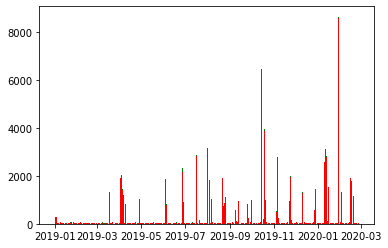

In [0]:
# create or transfer ownership
print(maker_vaults['actions_open_total'].sum())
print(maker_vaults['actions_give_total'].sum())

plt.bar(maker_vaults['date'], maker_vaults['actions_open_total'], color='green')
plt.bar(maker_vaults['date'], maker_vaults['actions_give_total'], color ='red')

plt.show()

194561
193704


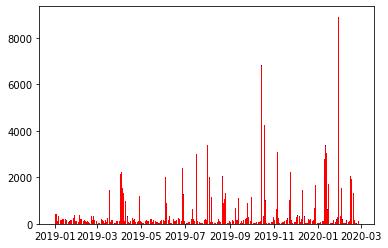

In [0]:
# add collateral
# joins = when someone actually deposits ETH but counts for everytime
# lock = daily count of times when an owner adds PETH collateral.

print(maker_vaults['actions_join_total'].sum())
print(maker_vaults['actions_lock_total'].sum())

plt.bar(maker_vaults['date'], maker_vaults['actions_join_total'], color='blue')
plt.bar(maker_vaults['date'], maker_vaults['actions_lock_total'], color ='red')

plt.show()

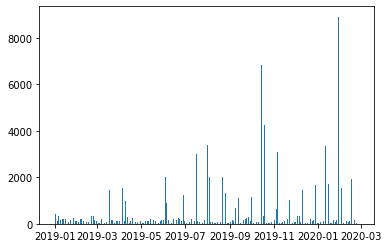

In [0]:
# lock more specifically 
plt.bar(maker_vaults['date'],maker_vaults['actions_lock_total'], width=0.5);

48577
53329


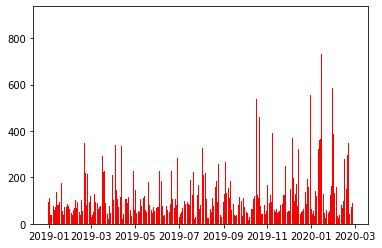

In [0]:
# Negative actions: Remove collateral and Liquation
# Free = daily count of times when an owner removes PETH collateral
# A user must free PETH before paying back Dai debt. 

print(maker_vaults['actions_free_total'].sum())
print(maker_vaults['actions_exit_total'].sum())

plt.bar(maker_vaults['date'], maker_vaults['actions_free_total'], color='green')
plt.bar(maker_vaults['date'], maker_vaults['actions_exit_total'], color ='red')

plt.show()

5498
18469


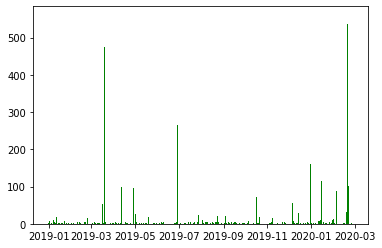

In [0]:
# liquidation and closing
print(maker_vaults['actions_bite_total'].sum())
print(maker_vaults['actions_shut_total'].sum())

plt.bar(maker_vaults['date'], maker_vaults['actions_bite_total'], color='green')
# plt.bar(maker_vaults['date'], maker_vaults['actions_shut_total'], color ='red')

plt.show()


In [0]:
# Repayment of loan actions
# Wipe = when someone repays a portion of Dai debt is repaid
# Draw - user borrows Dai which is minted and given to user
print(maker_vaults['actions_draw_total'].sum())

print(maker_vaults['actions_wipe_total'].sum())


204011
53221


In [0]:
# maker_vaults that have been open and joined to filter out non-zero vaults
# and make sure we don't get repeat joins 
maker_vaults['opened_and_joined'] = (maker_vaults['actions_open_total'] & maker_vaults['actions_join_total'])
maker_vaults.head()

,date,actions_lock_total,actions_give_total,actions_exit_total,actions_free_total,actions_open_total,actions_bite_total,actions_draw_total,actions_join_total,actions_shut_total,actions_wipe_total,month,year,opened_and_joined,net_opens
0,2019-01-01,167,21,92,92,29,2,144,168,4,99,1,2019,8,4
1,2019-01-02,415,263,113,107,276,8,407,415,18,127,1,2019,276,258
2,2019-01-03,408,265,133,112,291,18,395,414,20,123,1,2019,258,238
3,2019-01-04,102,24,36,32,22,0,123,102,6,40,1,2019,6,0
4,2019-01-05,100,24,40,35,36,1,113,100,4,41,1,2019,36,32


In [0]:
# lets find the total number of open and joined maker vaults
maker_vaults['net_opens'] = (maker_vaults['opened_and_joined'] - maker_vaults['actions_shut_total'])
maker_vaults['net_opens'].sum()

91154

In [0]:
# lets see the total number of opened and locked vaults
maker_vaults['opened_and_locked'] = (maker_vaults['opened_and_joined'] & maker_vaults['actions_lock_total'])
maker_vaults['opened_and_locked'].sum()

108766

In [0]:
# lets examine only 2019 data
maker_vaults2019 = maker_vaults[maker_vaults['year']==2019]
print(maker_vaults2019.shape)
maker_vaults2019.head()

(366, 15)


,date,actions_lock_total,actions_give_total,actions_exit_total,actions_free_total,actions_open_total,actions_bite_total,actions_draw_total,actions_join_total,actions_shut_total,actions_wipe_total,month,year,opened_and_joined,net_opens
0,2019-01-01,167,21,92,92,29,2,144,168,4,99,1,2019,8,4
1,2019-01-02,415,263,113,107,276,8,407,415,18,127,1,2019,276,258
2,2019-01-03,408,265,133,112,291,18,395,414,20,123,1,2019,258,238
3,2019-01-04,102,24,36,32,22,0,123,102,6,40,1,2019,6,0
4,2019-01-05,100,24,40,35,36,1,113,100,4,41,1,2019,36,32


In [0]:
# make a 2020 DataFrame 
maker_vaults2020 = maker_vaults[maker_vaults['year']==2020]
print(maker_vaults2020.shape)

(58, 16)


In [0]:
# Total Vaults opened in 2019
maker_vaults2019['opened_and_joined'].sum()

75424

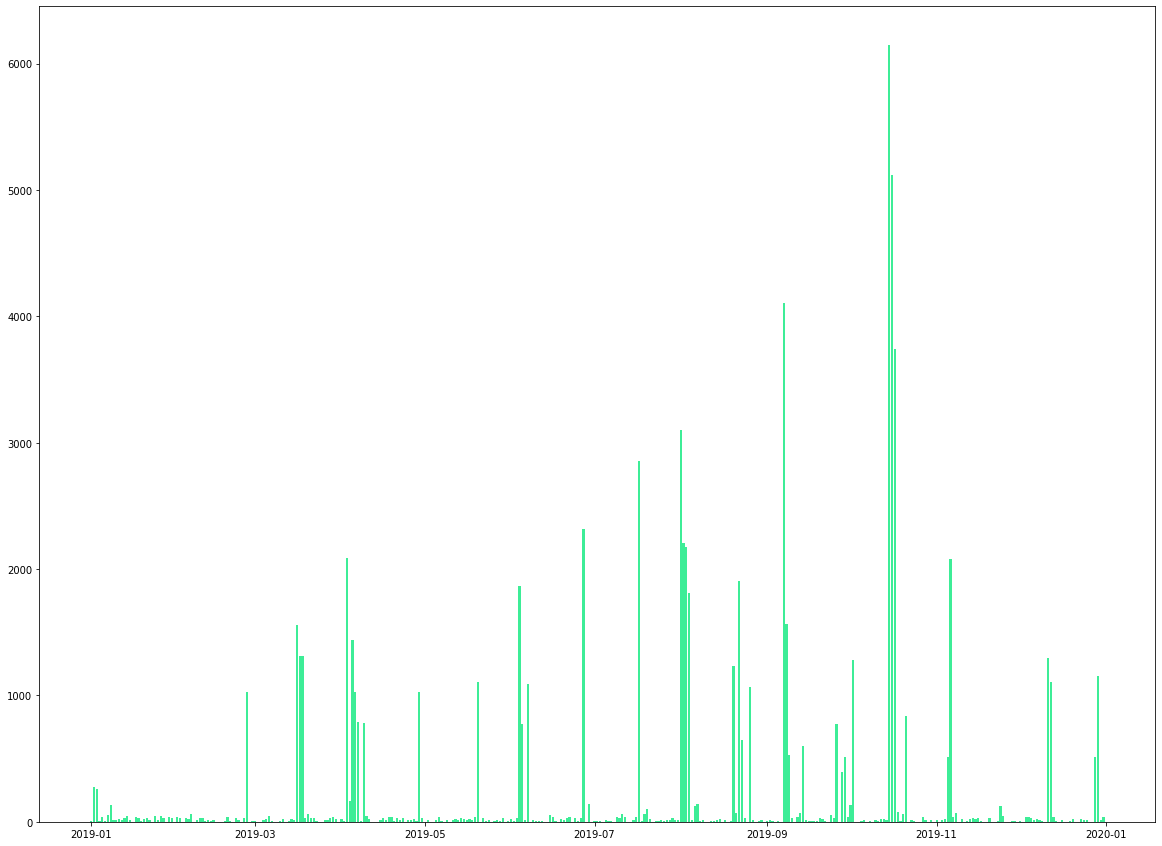

In [0]:
# net opens/closers per day 2019
plt.figure(figsize=(20,15))
plt.bar(maker_vaults2019['date'], maker_vaults2019['opened_and_joined'], color='#3DED97')
plt.show()

In [0]:
maker_vaults2019.sort_values(by=['opened_and_joined'], ascending=False)[:10]

,date,actions_lock_total,actions_give_total,actions_exit_total,actions_free_total,actions_open_total,actions_bite_total,actions_draw_total,actions_join_total,actions_shut_total,actions_wipe_total,month,year,opened_and_joined,net_opens
287,2019-10-15,6815,6460,728,719,6475,7,7135,6818,545,904,10,2019,6146,5601
288,2019-10-16,5710,5361,892,872,5384,17,6057,5713,618,1020,10,2019,5120,4502
249,2019-09-07,4446,4214,361,345,4246,15,4552,4454,219,423,9,2019,4102,3883
289,2019-10-17,4000,3750,539,534,3745,73,4289,4000,398,678,10,2019,3744,3346
212,2019-08-01,3384,3167,536,522,3166,39,3650,3386,393,660,8,2019,3098,2705
197,2019-07-17,2999,2840,188,183,2862,5,3114,2999,126,197,7,2019,2854,2728
177,2019-06-27,2394,2182,184,184,2315,0,2484,2394,131,182,6,2019,2314,2183
213,2019-08-02,3248,3029,393,383,3042,13,3486,3248,276,477,8,2019,2208,1932
214,2019-08-03,2434,2237,327,318,2256,11,2578,2436,208,375,8,2019,2176,1968
92,2019-04-03,2586,2365,358,347,2365,12,2743,2596,221,404,4,2019,2084,1863


In [0]:
maker_vaults2019[['date', 'opened_and_joined']].sort_values(by=['opened_and_joined'], ascending=False)[:15]

,date,opened_and_joined
287,2019-10-15,6146
288,2019-10-16,5120
249,2019-09-07,4102
289,2019-10-17,3744
212,2019-08-01,3098
197,2019-07-17,2854
177,2019-06-27,2314
213,2019-08-02,2208
214,2019-08-03,2176
92,2019-04-03,2084


In [0]:
# times a Vault in danger was liquidated (need to find out what in danger means)
print(maker_vaults2019['actions_bite_total'].sum())

3367


# Step 2: Check out the Second Data Set 

In [0]:
from google.colab import files
uploaded = files.upload()

Saving multi_dai_data.csv to multi_dai_data.csv


In [0]:
sai_alethio = pd.read_csv('multi_dai_data.csv')
sai_alethio.head()

,date,DAI_minted,DAI_burned,DAI_total_supply,DAI_transfers,DAI_value_transferred
0,2019-11-18,"1,047,234.54070716","2,557,057.09880202","100,188,912.261314",10248,"36,004,479.1578884"
1,2019-11-19,"2,185,301.48891004","4,452,905.44155448","97,921,308.30866991",10430,"71,413,671.61530559"
2,2019-11-20,"964,435.8069845459","2,899,539.38496035","95,986,204.73069409",8861,"54,080,170.2718997"
3,2019-11-21,"1,735,684.79756565","5,570,047.74827149","92,151,841.77998821",9316,"55,772,910.9678461"
4,2019-11-22,"1,434,688.09386729","5,494,703.33283886","88,091,826.5410167",18384,"128,399,929.094328"


In [0]:
pd.options.display.float_format = '{:,}'.format
sai_alethio.tail()

,date,DAI_minted,DAI_burned,DAI_total_supply,DAI_transfers,DAI_value_transferred
102,2020-02-27,"56,336.2955200216","55,136.0077386249","21,257,126.137783103",2062,"1,621,507.98965324"
103,2020-02-28,"11,638.5856031477","44,981.0685489146","21,223,783.6548374",1305,"872,846.046954265"
104,2020-02-29,"13,404.1828121818","35,995.7274511612","21,201,192.110198397",900,"453,158.595250074"
105,2020-03-01,"138,185.724954699","48,893.1488842704","21,290,484.686268803",1463,"1,221,449.00084123"
106,2020-03-02,"139,874.11921556198","13,119.016934691","21,417,239.788549602",1266,"1,208,330.06344957"


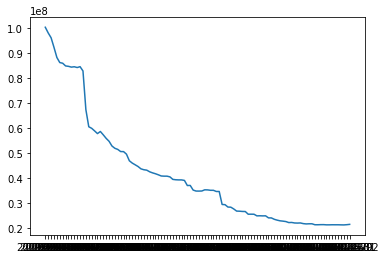

In [0]:
# the Drop in Sai since the migration to MCD
plt.plot(sai_alethio['date'], sai_alethio['DAI_total_supply'])

plt.show()

# Another data set from Coinmetrics with DAI and SAI supply

In [0]:
dai_df = pd.read_csv('https://raw.githubusercontent.com/coinmetrics-io/data/master/csv/dai.csv')
print(dai_df.shape)
dai_df['time'] = dai_df.sort_values(by=['time']).reset_index(drop=True)
dai_df.head(10)

(111, 25)


,time,AdrActCnt,CapMrktCurUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,2019-11-13,7.0,nan,0.0,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan,0.0,nan,nan,nan,nan
1,2019-11-14,0.0,nan,0.0,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan,0.0,nan,nan,nan,nan
2,2019-11-15,2.0,nan,0.0,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan,0.0,nan,nan,nan,nan
3,2019-11-16,0.0,nan,0.0,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan,0.0,nan,nan,nan,nan
4,2019-11-17,2.0,nan,0.0,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,nan,nan,nan,nan,nan,0.0,nan,nan,nan,nan
5,2019-11-18,"1,035.0",nan,"2,339,158.7257682835",nan,0.61287267,nan,nan,nan,nan,nan,"1,480,819.8018066639",979.0,"1,059.0","2,416,194.851827709",nan,"2,595.14441349",nan,75.0,nan,"2,748,257.933889888",nan,nan,nan,nan
6,2019-11-19,"1,724.0",nan,"10,004,706.045026584",nan,0.10329769,nan,nan,nan,nan,nan,"6,941,473.36390058","3,466.0","4,122.0","67,198,729.85714899",nan,"19,550.10980646",nan,"2,741.2091967605024",nan,"80,585,552.6222176",nan,nan,nan,nan
7,2019-11-20,"1,140.0","9,091,745.14825557","4,218,249.919156176","4,229,719.738694905",0.30990513,nan,0.00012415183658817604,1.0027190943539501,nan,nan,"9,067,090.872656975","2,299.0","2,764.0","29,257,634.22611682","29,337,188.494150985","16,181.32247625","16,225.321018834617","2,462.342176408194","2,469.037517117558","44,725,175.32436263","44,846,787.29606651",nan,nan,nan
8,2019-11-21,"1,309.0","12,680,509.15509459","6,856,174.632627749","6,872,485.582125718",0.17345686,nan,0.00013167925336779546,1.00237901605078,nan,nan,"12,650,413.618048253","4,069.0","5,198.0","72,931,182.8897593","73,104,687.34445642","18,174.54787147","18,217.785412571895","3,103.4433744665557","3,110.8265160670976","94,471,299.8359179","94,696,048.5745656",nan,nan,nan
9,2019-11-22,"1,525.0","14,710,432.800534084","4,083,059.9071668927","4,096,329.634624675",0.11809092,nan,0.00013785593962012654,1.00324994679468,nan,nan,"14,662,779.547143748","7,876.0","10,221.0","124,165,175.9543711","124,568,706.16997485","15,169.84916027","15,219.150362924194","3,333.0","3,343.832072666668","155,051,028.26709646","155,554,935.85942498",nan,nan,nan


In [0]:
# only want time, supply, accounts, price, and market cap
dai_df = dai_df[['time','CapMrktCurUSD', 'PriceBTC','SplyCur']]
dai_df.tail(10)

,time,CapMrktCurUSD,PriceBTC,SplyCur
101,2020-02-22,"50,704,760.39135664",0.00010327846715905048,"50,743,076.892240055"
102,2020-02-23,"50,999,441.88151045",0.00010033025842747949,"50,969,988.488087885"
103,2020-02-24,"51,818,145.42977429",0.00010361768698891407,"51,833,474.61497967"
104,2020-02-25,"51,071,993.37284892",0.00010706863155956036,"51,047,488.6900612"
105,2020-02-26,"52,394,268.21661859",0.00011468675176416124,"51,920,957.153097376"
106,2020-02-27,"55,023,882.70606475",0.00011489611736421944,"54,550,579.96166305"
107,2020-02-28,"53,000,728.09468656",0.0001150879606754929,"52,627,705.31920371"
108,2020-02-29,"52,344,573.180126816",0.00011737604759500844,"51,963,584.519814394"
109,2020-03-01,"51,738,292.196913175",0.00011812218939967649,"51,278,171.43618143"
110,2020-03-02,"49,883,660.77024543",0.00011268803204609424,"49,703,544.375994034"


In [0]:
import seaborn as sns

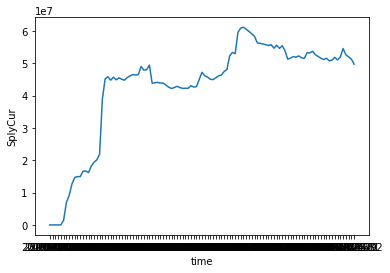

In [0]:
sns.lineplot(x='time', y="SplyCur",data=dai_df);


# Graphs on Plotly 

In [0]:
fig1 = go.Figure(data=[
    go.Bar(name='Opens', x=maker_vaults2019['date'], y=maker_vaults2019['opened_and_joined']),
    go.Bar(name='Give', x=maker_vaults2019['date'], y=maker_vaults2019['actions_give_total']),
    go.Bar(name='Free', x=maker_vaults2019['date'], y=maker_vaults2019['actions_free_total'], ),
    go.Bar(name='Lock', x=maker_vaults2019['date'], y=maker_vaults2019['actions_lock_total']),
    go.Bar(name='Exit', x=maker_vaults2019['date'], y=maker_vaults2019['actions_exit_total'])


])
# Change the bar mode
fig1.update_layout(barmode='group')
fig1.show()

In [0]:
# plotting the shuts, bites, draws, and wipes
fig2 = go.Figure(data=[
    # go.Bar(name='Opens', x=maker_vaults2019['date'], y=maker_vaults2019['opened_and_joined']),
    go.Bar(name='Shut', x=maker_vaults2019['date'], y=maker_vaults2019['actions_shut_total']),
    go.Bar(name='Bite', x=maker_vaults2019['date'], y=maker_vaults2019['actions_bite_total']),
    go.Bar(name='Draw', x=maker_vaults2019['date'], y=maker_vaults2019['actions_draw_total']),
    go.Bar(name='Wipe', x=maker_vaults2019['date'], y=maker_vaults2019['actions_wipe_total'])


])
# Change the bar mode
fig2.update_layout(barmode='group')
fig2.show()

In [0]:
# plotting Open/Join, Give, Lock, Free, Exit
fig = go.Figure(data=[
    go.Bar(name='Opens', x=maker_vaults2019['date'], y=maker_vaults2019['opened_and_joined']),
    go.Bar(name='Bites', x=maker_vaults2019['date'], y=maker_vaults2019['actions_bite_total']),
    go.Bar(name='Locks', x=maker_vaults2019['date'], y=maker_vaults2019['actions_lock_total']),
    go.Bar(name='Shuts', x=maker_vaults2019['date'], y=maker_vaults2019['actions_exit_total'])


])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()